# Chapter 7 Understanding Types¶
Julia as a Second Language, Erik Engheim Chapter 3 Control Flow

Topics

This chapter covers
- Understanding type hierarchies
- Differences between abstract and concrete types
- Combining primitive types to make composite types
- Harnessing the power of multiple dispatch to
- solve complex tasks elegantly
- How multiple dispatch differs from single dispatch in object-oriented languages1

## Using `typeof` function

All objects in Julia are of a particular type. Remember, you can use `typeof` to discover the type of any object"

In [ ]:
typeof(42), typeof('A'), typeof("abcd")

In [ ]:
# typeof works on type nd function too
typeof(String)

In [ ]:
typeof(sin)

In [ ]:
x = parse(Int32, "23")

## Creating composite types from primitive types

Let’s start with the basics: Integers, characters, and floating-point numbers are all
examples of primitive types. You cannot break them further down into smaller parts.

    In Julia Base (built-in objects), it includes following types:
    
- `Char`
- `String` 
- `Number` and all of its primitive aub-types (like `Float64` and `Int64`)
- `Tuple` 
- `NamedTuple` 
- `UnitRange`
- `Array` (`Matrix`, `Vector`)
- `Pair` 
- `Dict` 
- `Symbol`


### Abstract types vs. concrete types

In [ ]:
isabstracttype(Number), isconcretetype(Number)

In [ ]:
isabstracttype(Int32), isconcretetype(Int32)

### Primitive types vs. compositive types 

- A type is primitive if it is declared using the `primitive` keyword. 

- Composite types are created using either `struct` or `mutable struct`, and you can query this property using `isstructtype`.


In [ ]:
isprimitivetype(Char), isprimitivetype(String)

In [ ]:
isstructtype(Char), isstructtype(String)

### How is `String` type defined?
`
abstract type AbstractString end

    struct String <: AbstractString
         data::Vector{UInt8}
    end

## Example 1 - define a `Rectangle` compositive type

**Source** https://juliateachingctu.github.io/Julia-for-Optimization-and-Learning/stable/lecture_06/compositetypes/




In [ ]:
struct Rectangle
    bottomleft::Vector{Float64}
    width
    height
end

If the type annotation is omitted, `Any` is used, and such a field may contain any value. A Julia convention suggests making the first letter in custom type names uppercase. 

We can create a new instance of the above type by calling `Rectangle` (constructor) as a function. Its input arguments represent the fields of the Rectangle type.

In [ ]:
r = Rectangle([1,2], 3, 4)

In [ ]:
typeof(r)

In [ ]:
isa(r, Rectangle)

### Constructors

Constructors are functions that create new instances of composite types. When a user defines a new composite type, Julia creates the default constructors. 

Two constructors are automatically generated when a type is created. 
- One accepts any arguments and converts them to the field types, 
- and the other accepts arguments that match the field types exactly. 

If all fields are `Any`, only one constructor is generated. Julia creates these two constructors to make it easier to add new definitions without replacing the default constructor. We can list all constructors by the methods function.

In [ ]:
methods(Rectangle)

The fields of composite types can be accessed via the dot notation similarly to named tuples or via the getproperty function:

In [ ]:
r.width, getproperty(r, :width)

In [ ]:
# define functions working on Rectangle 
area(r::Rectangle) = r.width * r.height

function vertices(r::Rectangle)
    x, y = r.bottomleft
    w, h = r.width, r.height
    return [[x, y], [x + w, y], [x + w, y + h], [x, y + h]]
end

In [ ]:
r = Rectangle([0,0], 10, 20);
area(r), vertices(r)

### Rectangle defined in Python

class class Rectangle:

    def __init__(self, bottomleft, width, height):
        self.bottomleft = bottomleft
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def vertices(self):
        x, y = self.bottomleft
        w, h = self.width, self.height
        return [[x, y], [x + w, y], [x + w, y + h], [x, y + h]]

## Example 2 - define a `Point` compositive type

In [ ]:
abstract type AbstractPoint{T} end

struct Point{T <: Real} <: AbstractPoint{T}
    x::T
    y::T
end

In [ ]:
methods(Point)

In [ ]:
p = Point(1, 2.0)

Sometimes it is helpful to add additional constructors. 
In this example, we may want to create an instance of Point from two numbers with different types. 

This can be achieved by defining the following constructor.

`Point(x::Real, y::Real) = Point(promote(x, y)...)`

The promote function converts its arguments to the supertype that can represent both inputs. 
For example, promote(1, 2.3) results in the tuple (1.0, 2.3) because 
it is possible to represent Int64 by Float64, but not the other way round. 

In [ ]:
Point(x::Real, y::Real) = Point(promote(x, y)...)

In [ ]:
methods(Point)

In [ ]:
p = Point(1, 2.0)

In [ ]:
p = Point(1, Int8(5))

## Exploring type hierarchies

If you are familiar with object-oriented languages, then you should be familiar with
class2 inheritance hierarchies. In Julia, you also have type hierarchies, but a significant
difference is that these hierarchies also exist for primitive types. For example, in a language
such as Java or C++, an integer or floating-point number is just one concrete
type. However, in Julia, even numbers, collections, and strings are part of deeper type
hierarchies (figure 7.1).

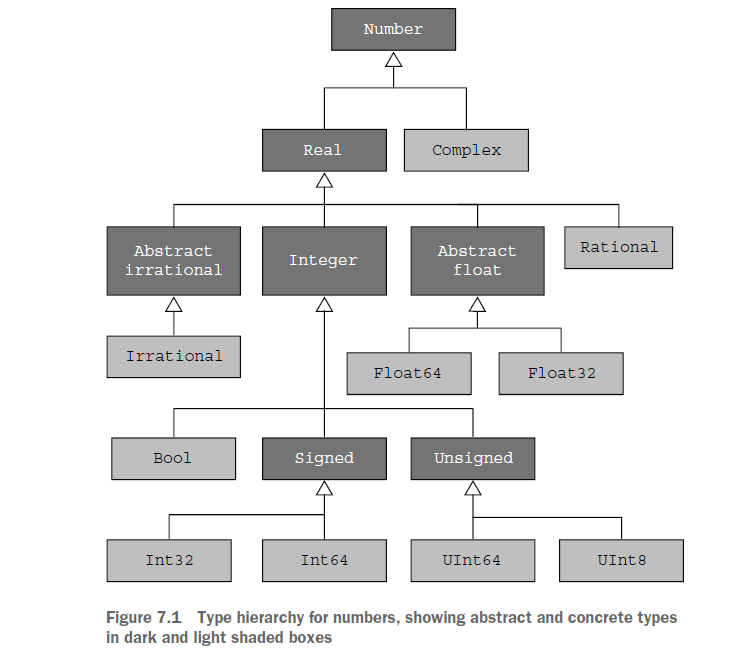

You can explore these hierarchies with the supertype and subtypes functions. You
can recreate the type hierarchy for numbers in figure 7.1 by starting at the top of the
type hierarchy and working your way downward, using the subtypes function to find
subtypes, which can then be explored further:

In [ ]:
subtypes(Number)

In [ ]:
subtypes(Real)

In [ ]:
subtypes(Integer)

In [ ]:
supertype(Signed)

In [ ]:
""" 
    Print supertype hierarchy of a given type using recursive call

"""

function findroot(T)
    @assert typeof(T) == DataType
    T2 = supertype(T)
    println(T)
    if T2 != T
        findroot(T2)
    end
end

In [ ]:
findroot(Float32)

In [ ]:
# Print supertype tree of Int64
T1 = String
T2 = supertype(T1)
print("$T1 ==> $T2")
while T2 != T1
    T1, T2 = T2, supertype(T2)
    print(" ==> $T2")
end

In [ ]:
"""
    Print supertype hierarchy of a given type

"""

function print_supertype_tree(T)
    @assert typeof(T) == DataType 
    T1 = T
    T2 = supertype(T1)
    print("$T1 ==> $T2")
    while T2 != T1
        T1 , T2 = T2, supertype(T2)
        print(" ==> $T2")
    end
    return
end

In [ ]:
print_supertype_tree(String)

In [ ]:
print_supertype_tree(Char)

In [ ]:
print_supertype_tree(56)

In [ ]:
typeof(cos) <: Function

In [ ]:
using Colors

print_supertype_tree(RGB{Float32})

### Using the `<:` operator to check subtype relationship

In [ ]:
Int64 <: Number, Bool <: Number, Char <: Number

In [ ]:
# This is usefule to @assert if a variable is a Type
typeof(String) <: DataType

In [ ]:
# This is usefule to @assert if a variable is a Function
typeof(sin) <: Function

In [ ]:
typeof(image)

## Creating a battle simulator

To further explore these concepts, you will develop a simple simulator of battles
between different warriors, as is frequently done in board games, card games, and
video games.

Many computer games work on the rock-paper-scissors principle. Let me clarify:
there are archers, knights, and pikemen in your game, which you would set up so that

- archers beat pikemen,
- knights beat archers, and
- pikemen beat knights.

### 1.Defining requred `structs` types

- `Archer`, 
- `Knight`, 
- `Pikeman`

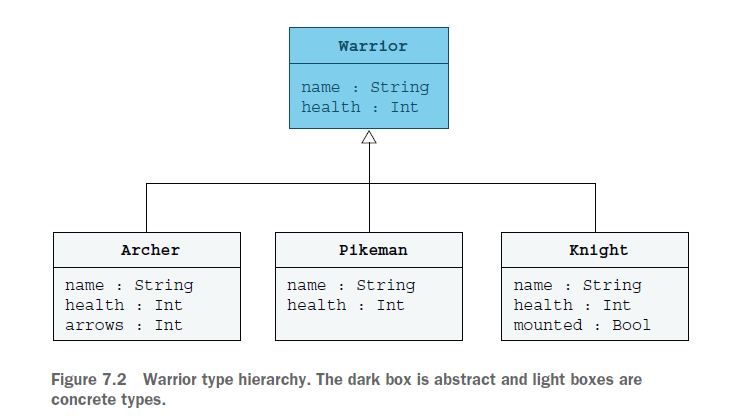

In [ ]:
export Warrior
export Archer, Knight, Pikeman

export battle!, attack!, resupply!, shoot!, mount!, dismount!

abstract type Warrior end

mutable struct Archer <: Warrior
    name::String
    health::Int
    arrows::Int
end

mutable struct Pikeman <: Warrior
    name::String
    health::Int
end

mutable struct Knight <: Warrior
    name::String
    health::Int
    mounted::Bool
end

In [ ]:
methods(Knight)

### 2 Defining additional constructors

In [ ]:
function Knight(name::AbstractString, health::Integer)
   Knight(name, health, true) 
end

In [ ]:
methods(Knight)

In [ ]:
function Archer(name::AbstractString, health::Integer)
    archer = Archer(name, health, 0)
    resupply!(archer)
    archer
end

### 3. Adding  behaviors to warriors

All these functions have an exclamation mark in their name because they modify a
field (remember, this is only a convention). That’s why the composite types have the
mutable keyword added to their definitions. If a struct type is not defined as mutable,
it will not support functions that modify a field. Without the mutable keyword, a composite
type will default to being immutable.

Here is a short description of what each function does:

- `shoot!`—An archer shoots an arrow. Deplete the number of arrows by one.
- `resupply!`—Simulate that archer gets a resupply of 24 arrows.
- `mount!`—Change the state of the knight to be mounted on a horse.
- `dismount!`—Dismount the knight to make ready for foot combat.

In [ ]:
"""
    shoot(a::Archer)
Shoot an arrow. Deplete nubmer of arrows in quiver.
"""
function shoot!(archer::Archer)
    if archer.arrows > 0
        archer.arrows -= 1
    end
    archer
end

"""
    resupply!(a::Archer)
Ressuply archer `a` with arrows.
"""
function resupply!(archer::Archer)
    archer.arrows = 24
    archer
end

function mount!(knight::Knight)
    knight.mounted = true
    knight
end

function dismount!(k::Knight)
    knight.mounted = false
    knight
end

### 4 Adding `attack!` function

In [ ]:
"""
    attack!(a::Archer, b::Knight)
Archers can do some damage to a knight when when he is mounted
because the horse is vulnurable. Hurting dismounted knights is harder
as most arrows cannot pierce plate armor.
"""
function attack!(a::Archer, b::Knight)
    if a.arrows > 0
        shoot!(a)
        damage = rand(1:6)
        if b.mounted
            damage += 3
        end
        b.health = max(b.health - damage, 0)
    end
    a.health, b.health
end

"""
    attack!(a::Knight, b::Knight)
Knights vs knights is evenly matched and both have a fairly good chance of
disengaging so casualties are not that high.
"""
function attack!(a::Knight, b::Knight)
    a.health = max(a.health - rand(1:6), 0)
    b.health = max(b.health - rand(1:6), 0)
    a.health, b.health
end

"""
    attack!(a::Archer, b::Pikeman)
Because pikemen move slowly they cannot easily get away from the rain of
arrows and thus take significant damage.
"""
function attack!(a::Archer, b::Pikeman)
    if a.arrows > 0
        shoot!(a)
        damage = 4 + rand(1:6)
        b.health = max(b.health - damage, 0)
    end
    a.health, b.health
end

"""
    attack!(a::Pikeman, b::Archer)
It is hard for pikemen to attack archers are they move slowly. Thus
only when lucky do they succeed in causing some injury.
"""
function attack!(a::Pikeman, b::Archer)
   if rand(1:6) >= 5
       b.health = max(b.health - 2, 0)
   end
   a.health, b.health
end

"""
    attack!(a::Pikeman, b::Pikeman)
Pikemen vs pikemen attacks were generally avoided as 
they tended to get  brutal and with heavy causualties. 
It is hard to escape such a close encounter once it begins.
"""
function attack!(a::Pikeman, b::Pikeman)
    for _ in 1:3 
        a.health = max(a.health - rand(1:6), 0)        
        b.health = max(b.health - rand(1:6), 0)
        
        if a.health > 0 && b.health > 0
            break
        end
    end
    a.health, b.health
end

"""
    attack!(a::Pikeman, b::Knight)
Due to the superior mobility of knights, a pikeman cannot easily engage a
knight which does not choose to attack, unless the knight is dismounted.
"""
function attack!(a::Pikeman, b::Knight)
    if rand(1:6) >= 6
        damage = 1
        if b.mounted
            damage += rand(1:6)
        end
        b.health = max(b.health - damage, 0)
    end
    a.health, b.health
end

"""
    attack!(a::Knight, b::Archer)
Archers attacked by knights would suffer heavy losses as they have poor
armor.
"""
function attack!(a::Knight, b::Archer)
    damage = 8 + 2*rand(1:6)
    b.health = max(b.health - damage, 0)
    a.health, b.health  
end

"""
    attack!(a::Knight, b::Pikeman)
Mounted knights attacking pikemen will usually suffer heavy losses
unless attacking on a flank or the rear. Unmounted knights are more
effective as pikemen cannot attack their vulnurable horses.
"""
function attack!(a::Knight, b::Pikeman)
    damage = rand(1:6)
    b.health = max(b.health - damage, 0)
    
    damage = rand(1:6)
    if a.mounted
        damage += 2*rand(1:6)
    end
    a.health = max(b.health - damage, 0)
    
    a.health, b.health
end


### 5 Adding `battle!` function

In [ ]:
"""
    battle!(a::Warrior, b::Warrior)
Display the outcome of warrior `a` attacking warrior `b`
"""
function battle!(a::Warrior, b::Warrior)
    attack!(a, b)
    if a.health == 0 && b.health == 0
        println(a.name, " and ", b.name, " destroyed each other")
    elseif a.health == 0
        println(b.name, " defeated ", a.name)
    elseif b.health == 0
        println(a.name, " defeated ", b.name)
    else
        println(b.name, " survived attack from ", a.name)
    end
end

### Multiple Dispatch

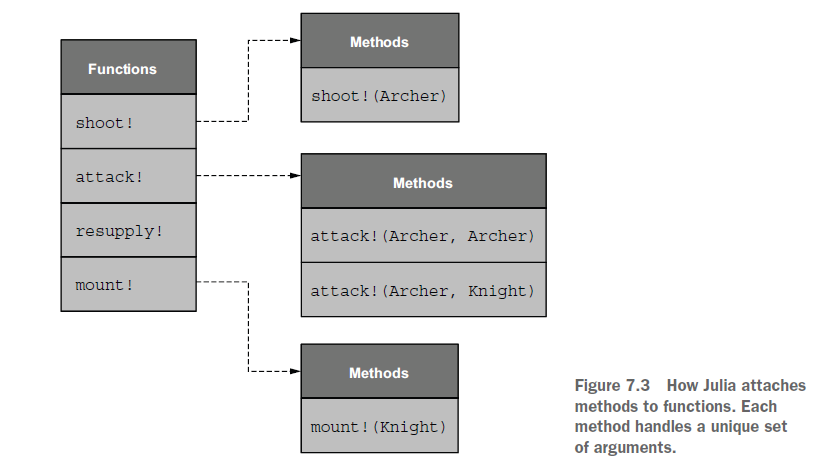

## How Julia selects method to call

When you invoke `attack!(a, b)`, Julia will find the type of every argument to find a
tuple of all the argument types:

`argtypes = (typeof(a), typeof(b))`

Julia will use this tuple of argument types to look through the list of all methods to
find the one matching. Remember, functions don’t have code in Julia; methods have
code. If a function doesn’t have any methods, you cannot run that function. This process
is illustrated in figure 7.4.

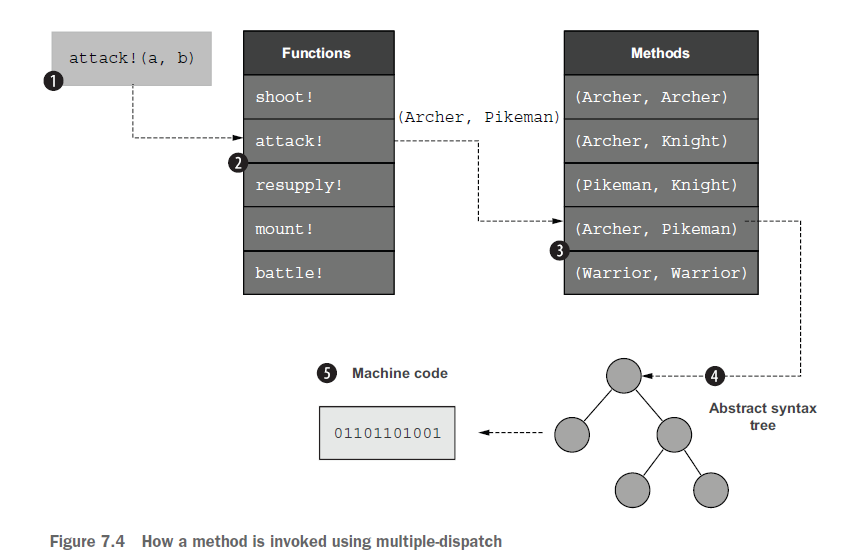

## Example 3 The need for Inner constructor

**Source** https://juliateachingctu.github.io/Julia-for-Optimization-and-Learning/stable/lecture_06/compositetypes/

The constructor defined in the above examples is the `outer` constructor because it is defined outside of the type definition. A constructor behaves like any other function in Julia and may have multiple methods. We can define new methods to add additional functionality to a constructor. On the other hand, `outer` constructors cannot construct self-referential objects or instances with some special properties. In such a case, we have to use `inner` constructors, which differ from outer constructors in two aspects:

1. They are declared inside the composite type declaration rather than outside of it.
2. They have access to the local function `new` that creates new instances of the composite type.For example, one may want to create a type with two real numbers, where the first number cannot be greater than the second one. The inner constructor can ensure this.


In [ ]:
struct OrderedPair{T <: Real}
    x::T
    y::T

    function OrderedPair(x::Real, y::Real)
        x > y && error("the first argument must be less than or equal to the second one")
        xp, yp = promote(x, y)
        return new{typeof(xp)}(xp, yp)
    end
end

If an `inner` constructor method is provided, no default constructor method is constructed. The example above ensures that any instance of the OrderedPair satisfies x <= y.

In [ ]:
x = OrderedPair(1,2.0)

In [ ]:
x.x, x.y

In [ ]:
OrderedPair(2.0, 1)